In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime as dt
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
pd.set_option("max_rows", None)


In [4]:
#Reading mta data from last 3 weeks after the pandemic restrictions
df1= pd.read_csv("C:/Users/Mert/Desktop/turnstile_210522.txt", sep=',',header =None,names=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS'])                                                           


df2= pd.read_csv("C:/Users/Mert/Desktop/turnstile_210529.txt", sep=',',header =None,names=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS'])                                                           

df3= pd.read_csv("C:/Users/Mert/Desktop/turnstile_210605.txt", sep=',',header =None,names=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS'])                                                           

df = pd.concat([df1, df2, df3])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627758 entries, 0 to 209530
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       627758 non-null  object
 1   UNIT      627758 non-null  object
 2   SCP       627758 non-null  object
 3   STATION   627758 non-null  object
 4   LINENAME  627758 non-null  object
 5   DIVISION  627758 non-null  object
 6   DATE      627758 non-null  object
 7   TIME      627758 non-null  object
 8   DESC      627758 non-null  object
 9   ENTRIES   627758 non-null  int64 
 10  EXITS     627758 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 57.5+ MB


In [6]:
df.count()

C/A         627758
UNIT        627758
SCP         627758
STATION     627758
LINENAME    627758
DIVISION    627758
DATE        627758
TIME        627758
DESC        627758
ENTRIES     627758
EXITS       627758
dtype: int64

In [7]:
df['DATETIME'] = df["DATE"]+ " " + df["TIME"]
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%m/%d/%Y %H:%M:%S')


In [8]:
df.isnull().sum() #CHECKING NULL VALUE COUNT FOR EVERY COLUMN

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
DATETIME    0
dtype: int64

In [9]:
df['TOTAL'] = df['EXITS'] + df['ENTRIES']

In [10]:
#Creating a column based on day of the week from DATETIME formatted column 'DATE'
df['DAY'] = df['DATETIME'].dt.day_name()

In [11]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TOTAL,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,00:00:00,REGULAR,7571883,2587474,2021-05-15 00:00:00,10159357,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,04:00:00,REGULAR,7571891,2587475,2021-05-15 04:00:00,10159366,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,08:00:00,REGULAR,7571901,2587491,2021-05-15 08:00:00,10159392,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,12:00:00,REGULAR,7571944,2587529,2021-05-15 12:00:00,10159473,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,16:00:00,REGULAR,7572041,2587565,2021-05-15 16:00:00,10159606,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,20:00:00,REGULAR,7572186,2587583,2021-05-15 20:00:00,10159769,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/16/2021,00:00:00,REGULAR,7572256,2587600,2021-05-16 00:00:00,10159856,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/16/2021,04:00:00,REGULAR,7572262,2587601,2021-05-16 04:00:00,10159863,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/16/2021,08:00:00,REGULAR,7572272,2587617,2021-05-16 08:00:00,10159889,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/16/2021,12:00:00,REGULAR,7572303,2587645,2021-05-16 12:00:00,10159948,Sunday


In [12]:
df.count()

C/A         627758
UNIT        627758
SCP         627758
STATION     627758
LINENAME    627758
DIVISION    627758
DATE        627758
TIME        627758
DESC        627758
ENTRIES     627758
EXITS       627758
DATETIME    627758
TOTAL       627758
DAY         627758
dtype: int64

In [13]:
df['TIME_INTERVAL'] = df['DATETIME']


df.loc[(df.TIME >= '00:00:00') & (df.TIME< '04:00:00'),'TIME_INTERVAL'] = '00AM-04AM'
df.loc[(df.TIME >= '04:00:00') & (df.TIME< '08:00:00'),'TIME_INTERVAL'] = '04AM-08AM'

df.loc[(df.TIME >= '08:00:00') & (df.TIME< '12:00:00'),'TIME_INTERVAL'] = '08AM-12PM'

df.loc[(df.TIME >= '12:00:00') & (df.TIME< '16:00:00'),'TIME_INTERVAL'] = '12PM-16PM'
df.loc[(df.TIME >= '16:00:00') & (df.TIME< '20:00:00'),'TIME_INTERVAL'] = '16PM-20PM'
df.loc[(df.TIME >= '20:00:00') & (df.TIME <= '23:59:59'),'TIME_INTERVAL'] = '20PM-00AM'


In [14]:
df['WEEKEND_OR_WORKDAY'] = df['DAY']
df['WEEKEND_OR_WORKDAY'] = df['WEEKEND_OR_WORKDAY'].map({'Monday':'Workday','Tuesday':'Workday','Wednesday':'Workday','Thursday':'Workday','Friday':'Workday','Saturday':'Weekend','Sunday':'Weekend'})

In [15]:
df = df[["STATION","DATE","TIME","DAY","DATETIME","ENTRIES","EXITS",'TOTAL','TIME_INTERVAL','WEEKEND_OR_WORKDAY']]
df.head(10)

,STATION,DATE,TIME,DAY,DATETIME,ENTRIES,EXITS,TOTAL,TIME_INTERVAL,WEEKEND_OR_WORKDAY
0,59 ST,05/15/2021,00:00:00,Saturday,2021-05-15 00:00:00,7571883,2587474,10159357,00AM-04AM,Weekend
1,59 ST,05/15/2021,04:00:00,Saturday,2021-05-15 04:00:00,7571891,2587475,10159366,04AM-08AM,Weekend
2,59 ST,05/15/2021,08:00:00,Saturday,2021-05-15 08:00:00,7571901,2587491,10159392,08AM-12PM,Weekend
3,59 ST,05/15/2021,12:00:00,Saturday,2021-05-15 12:00:00,7571944,2587529,10159473,12PM-16PM,Weekend
4,59 ST,05/15/2021,16:00:00,Saturday,2021-05-15 16:00:00,7572041,2587565,10159606,16PM-20PM,Weekend
5,59 ST,05/15/2021,20:00:00,Saturday,2021-05-15 20:00:00,7572186,2587583,10159769,20PM-00AM,Weekend
6,59 ST,05/16/2021,00:00:00,Sunday,2021-05-16 00:00:00,7572256,2587600,10159856,00AM-04AM,Weekend
7,59 ST,05/16/2021,04:00:00,Sunday,2021-05-16 04:00:00,7572262,2587601,10159863,04AM-08AM,Weekend
8,59 ST,05/16/2021,08:00:00,Sunday,2021-05-16 08:00:00,7572272,2587617,10159889,08AM-12PM,Weekend
9,59 ST,05/16/2021,12:00:00,Sunday,2021-05-16 12:00:00,7572303,2587645,10159948,12PM-16PM,Weekend


In [16]:
df_total_entries = df.groupby(['STATION']).agg({'TOTAL': 'sum'}).sort_values(['TOTAL'], ascending=False).reset_index().head(10)

df_total_entries

,STATION,TOTAL
0,42 ST-PORT AUTH,1734388997696
1,125 ST,1537225754584
2,23 ST,1442620328204
3,DEKALB AV,1379345943419
4,34 ST-PENN STA,1253304955205
5,CANAL ST,1194175711830
6,161/YANKEE STAD,1117293998167
7,183 ST,928009821484
8,FULTON ST,900925236238
9,34 ST-HERALD SQ,895398022815


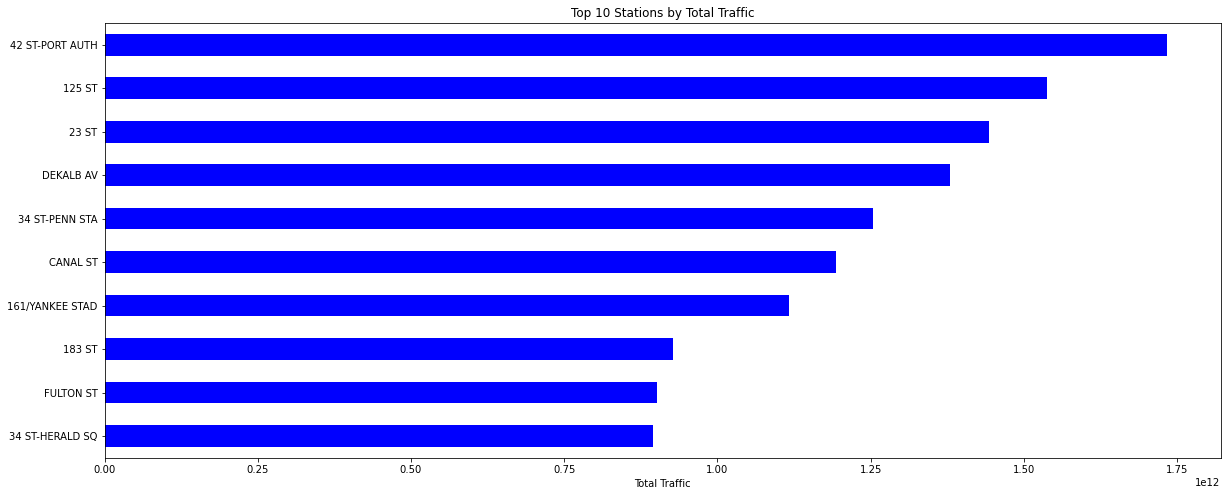

In [17]:

top_10_station =df.groupby(['STATION']).agg({'TOTAL':sum}).sort_values(by = 'TOTAL', ascending = False).head(10)


fig, ax = plt.subplots(figsize=(20, 8))
top_10_station.sort_values(by = 'TOTAL',ascending=True).plot(kind='barh', color ='blue',ax=ax)
ax.set(title='Top 10 Stations by Total Traffic', xlabel='Total Traffic', ylabel='')
ax.legend().set_visible(False)
plt.savefig('top10.png')

In [18]:
#top10 stations daily traffic
daily_top10 = list(df_total_entries['STATION'][: 10])
df_entries_byday = df.groupby(['STATION', 'DAY']).agg({'TOTAL': 'sum'}).reset_index()
df_entries_byday = df_entries_byday[df_entries_byday['STATION'].isin(daily_top10)].sort_values("DAY", ascending=True).sort_index(level="STATION_LINE", sort_remaining=False)
df_entries_byday.reset_index(inplace=True)
df_entries_byday.drop(columns='index', inplace=True)

df_entries_byday

,STATION,DAY,TOTAL
0,125 ST,Friday,220779736910
1,125 ST,Monday,220745100646
2,125 ST,Saturday,212610239865
3,125 ST,Sunday,220774410375
4,125 ST,Thursday,220762606221
5,125 ST,Tuesday,220776250373
6,125 ST,Wednesday,220777410194
7,161/YANKEE STAD,Friday,157779847491
8,161/YANKEE STAD,Monday,157778813006
9,161/YANKEE STAD,Saturday,157778460556


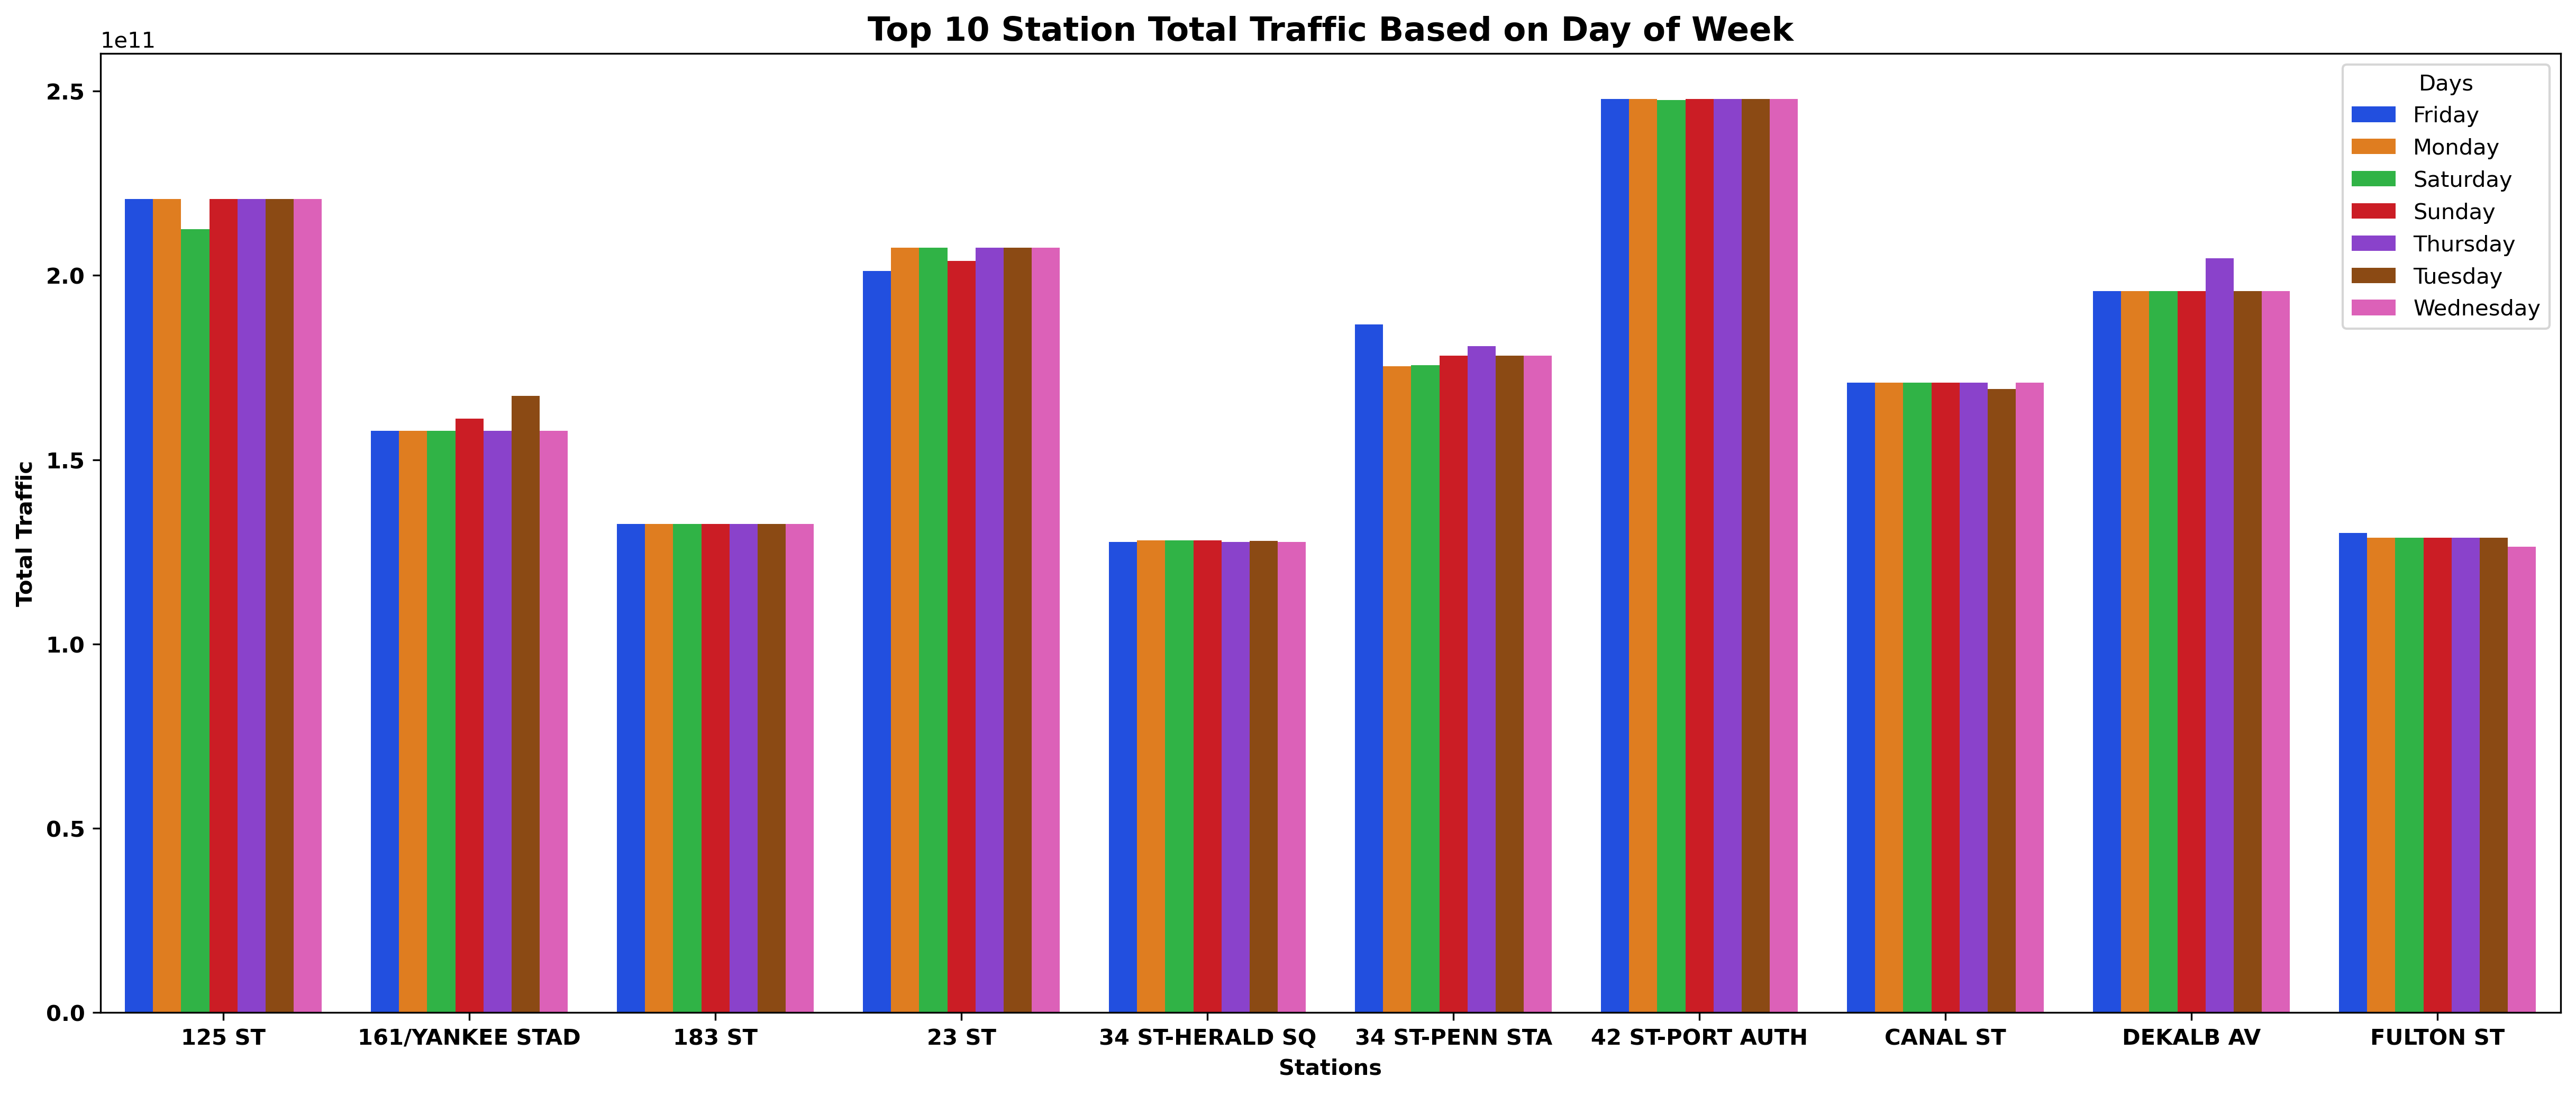

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(20,8),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TOTAL", hue="DAY",data=df_entries_byday,palette="bright")
plt.title("Top 10 Station Total Traffic Based on Day of Week", weight="bold", fontsize=15)
plt.xlabel("Stations",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()
plt.savefig('top_10_byday.png')

In [20]:
week_end = (df['WEEKEND_OR_WORKDAY'] == 'Weekend')
df_weekend_total_entries = df[week_end].groupby(['STATION']).agg({'TOTAL': 'sum'}).sort_values(['TOTAL'], ascending=False).head(10)
df_weekend_total_entries.reset_index(inplace=True)
df_weekend_total_entries


,STATION,TOTAL
0,42 ST-PORT AUTH,495374903942
1,125 ST,433384650240
2,23 ST,411429686286
3,DEKALB AV,391570105889
4,34 ST-PENN STA,353889707074
5,CANAL ST,341678597842
6,161/YANKEE STAD,318919363565
7,183 ST,265145279913
8,FULTON ST,257760028959
9,34 ST-HERALD SQ,256279338938


In [22]:
work_day = (df['WEEKEND_OR_WORKDAY'] == 'Workday')
df_workday_total_entries = df[work_day].groupby(['STATION']).agg({'TOTAL': 'sum'}).sort_values(['TOTAL'], ascending=False).head(10)
df_workday_total_entries.reset_index(inplace=True)
df_workday_total_entries

,STATION,TOTAL
0,42 ST-PORT AUTH,1239014093754
1,125 ST,1103841104344
2,23 ST,1031190641918
3,DEKALB AV,987775837530
4,34 ST-PENN STA,899415248131
5,CANAL ST,852497113988
6,161/YANKEE STAD,798374634602
7,183 ST,662864541571
8,FULTON ST,643165207279
9,34 ST-HERALD SQ,639118683877


In [23]:
top10 = list(df_total_entries['STATION'][:10])

avg_day = df["STATION"].isin(top10)
avg_day = df[avg_day].groupby(["DAY", "STATION"]).agg({'TOTAL': 'sum'}).reset_index()
avg_day
pv_day_entries = avg_day.pivot(index = "STATION", columns = "DAY", values = "TOTAL")
pv_day_entries




DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STATION,,,,,,,
125 ST,220779736910,220745100646,212610239865,220774410375,220762606221,220776250373,220777410194
161/YANKEE STAD,157779847491,157778813006,157778460556,161140903009,157776633127,167260025967,157779315011
183 ST,132573088046,132572733052,132572609801,132572670112,132572997186,132572816237,132572907050
23 ST,201178436130,207522961557,207492953865,203936732421,207497567896,207495273755,207496402580
34 ST-HERALD SQ,127666123968,128141025240,128139202369,128140136569,127668236498,127981604159,127661694012
34 ST-PENN STA,186663090258,175424084205,175596643615,178293063459,180786358432,178247196409,178294518827
42 ST-PORT AUTH,247804794022,247800928507,247574662711,247800241231,247803778757,247801810426,247802782042
CANAL ST,170839228129,170839589170,170839000793,170839597049,170832543316,169144228622,170841524751
DEKALB AV,195786432949,195785340902,195784954988,195785150901,204632599445,195785592079,195785872155


NameError: name 'sns_plot' is not defined

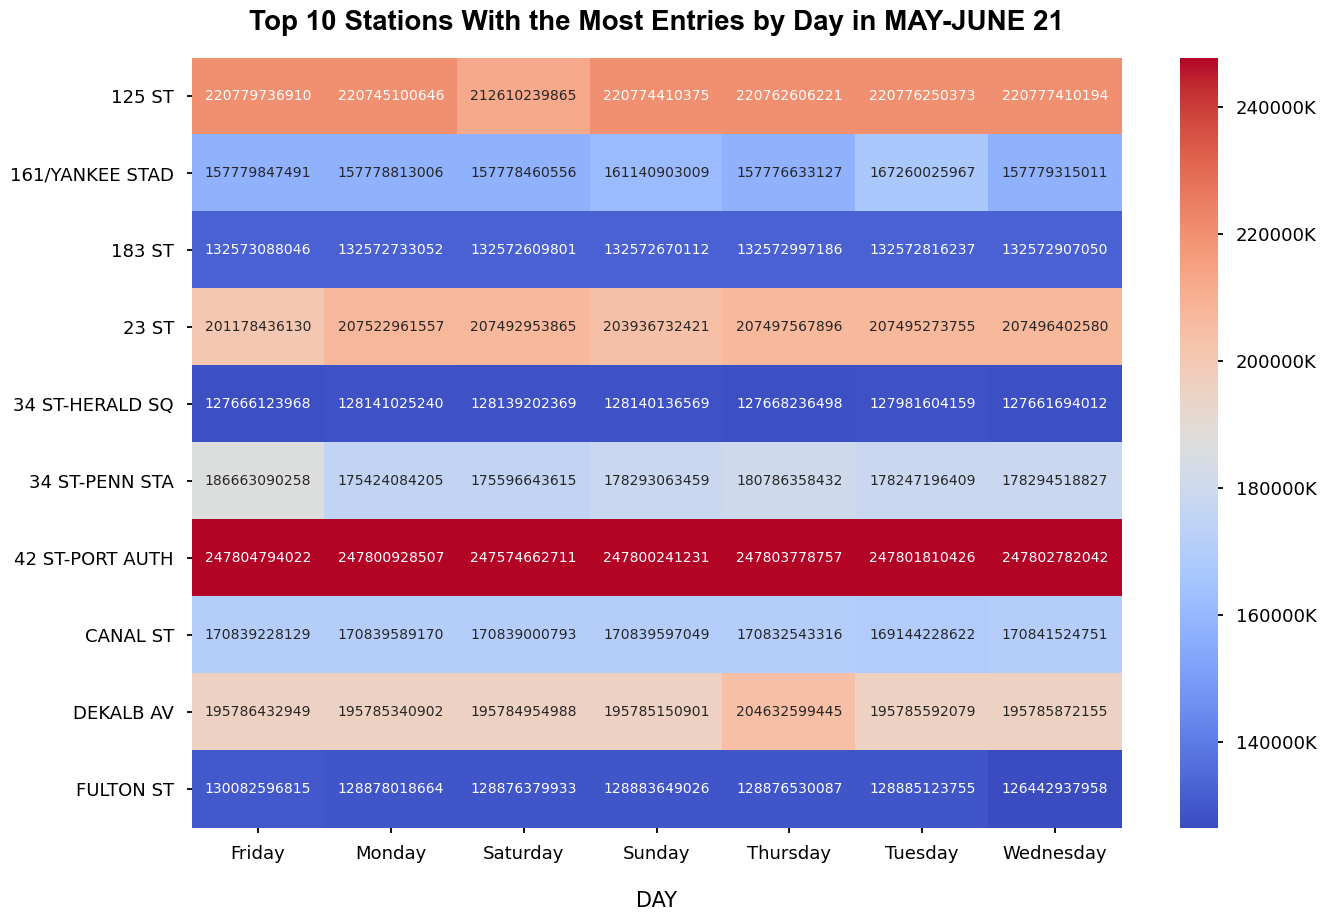

In [24]:
f, heatmap_day_entries = plt.subplots(figsize=(15, 10))
heatmap_day_entries = sns.heatmap(pv_day_entries, cmap="coolwarm",annot=True,fmt="d")

heatmap_day_entries.set_title("Top 10 Stations With the Most Entries by Day in MAY-JUNE 21",
                             fontname="Arial",
                             fontsize=20,
                             fontweight='bold',
                             pad=20)

heatmap_day_entries.set_xlabel("DAY", labelpad = 20, fontsize=15)
heatmap_day_entries.set_ylabel("", labelpad = 20)
heatmap_day_entries.set_xticklabels(heatmap_day_entries.get_xticklabels(), rotation = 0)
heatmap_day_entries.set_yticklabels(heatmap_day_entries.get_yticklabels(), rotation = 0)

colorbar = heatmap_day_entries.collections[0].colorbar
colorbar_ticks = [str(int(tick))+"K" for tick in colorbar.get_ticks()/1000000]
colorbar.set_ticks(colorbar.get_ticks())
colorbar.set_ticklabels(colorbar_ticks)
sns_plot.savefig('stationheatmap.png')

In [26]:
top10 = list(df_total_entries['STATION'][:10])

pv_time = df["STATION"].isin(top10)
pv_time = df[pv_time].groupby(["TIME_INTERVAL", "STATION"]).agg({'TOTAL': 'sum'}).reset_index()
pv_time
pv_time_entries = pv_time.pivot(index = "STATION", columns = "TIME_INTERVAL", values = "TOTAL")
pv_time_entries


TIME_INTERVAL,00AM-04AM,04AM-08AM,08AM-12PM,12PM-16PM,16PM-20PM,20PM-00AM
STATION,,,,,,
125 ST,257572118864,249378657474,257572322179,257556595063,257572879973,257573181031
161/YANKEE STAD,184072580707,184075528931,186832005043,184075618285,194162502655,184075762546
183 ST,154668269421,154668272044,154668289820,154668308787,154668330014,154668351398
23 ST,242077768717,242077783343,238521004499,242078154587,235786823640,242078793418
34 ST-HERALD SQ,149258477361,149258503184,149258619492,149260623359,149182110687,149179688732
34 ST-PENN STA,207999262169,210666237546,213290327931,208012251028,208012415071,205324461460
42 ST-PORT AUTH,289101960616,288877093100,289102140636,289102341485,289102589696,289102872163
CANAL ST,199310302290,197617034882,199314213681,199304667158,199314638879,199314854940
DEKALB AV,228416483527,228416490011,237262976023,228416592237,228416661603,228416740018


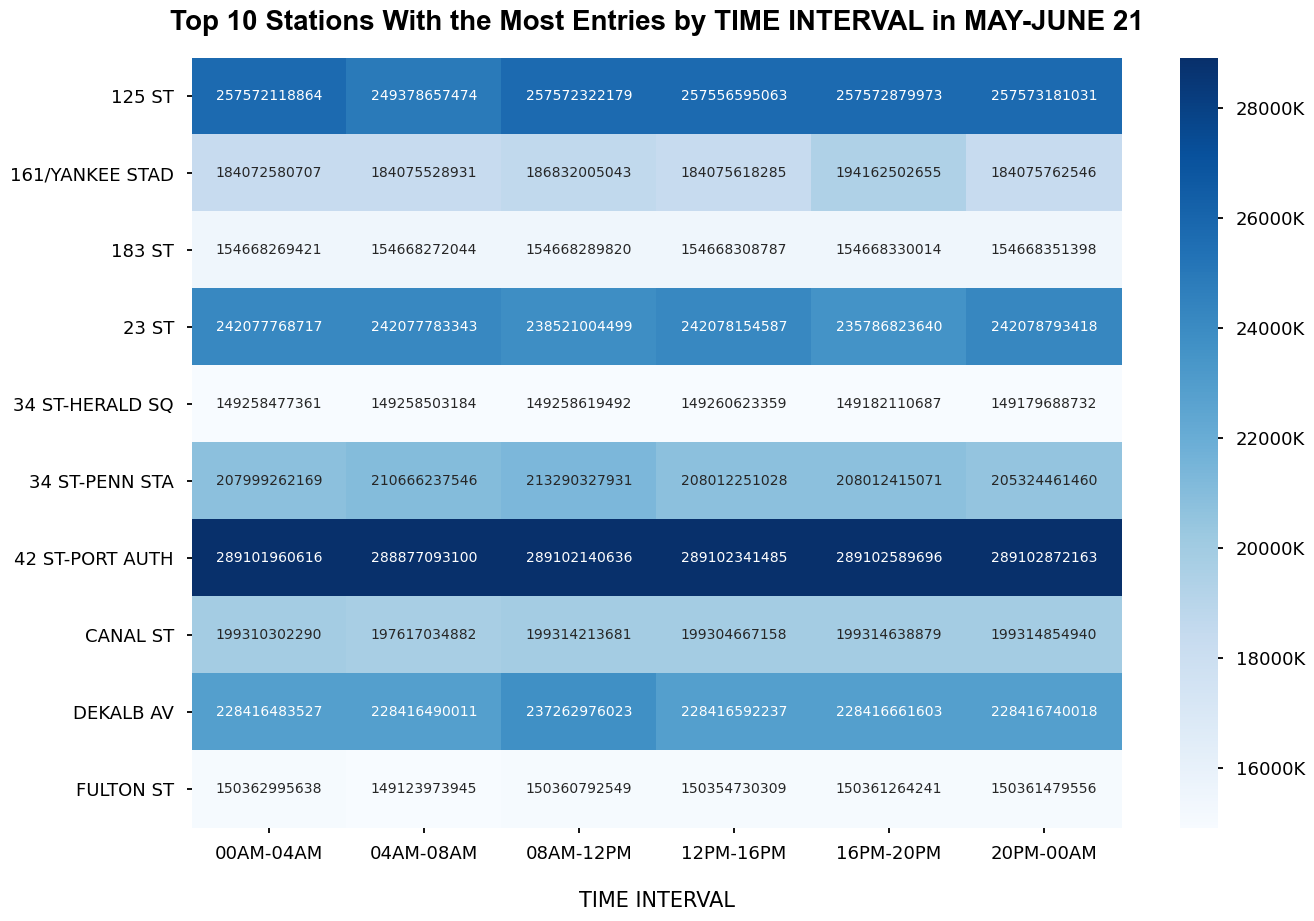

In [27]:
f, heatmap_time_entries = plt.subplots(figsize=(15, 10))
heatmap_time_entries = sns.heatmap(pv_time_entries, cmap="Blues",annot=True,fmt="d")

heatmap_time_entries.set_title("Top 10 Stations With the Most Entries by TIME INTERVAL in MAY-JUNE 21",
                             fontname="Arial",
                             fontsize=20,
                             fontweight='bold',
                             pad=20)

heatmap_time_entries.set_xlabel("TIME INTERVAL", labelpad = 20, fontsize=15)
heatmap_time_entries.set_ylabel("", labelpad = 20)
heatmap_time_entries.set_xticklabels(heatmap_time_entries.get_xticklabels(), rotation = 0)
heatmap_time_entries.set_yticklabels(heatmap_time_entries.get_yticklabels(), rotation = 0)

colorbar = heatmap_time_entries.collections[0].colorbar
colorbar_ticks = [str(int(tick))+"K" for tick in colorbar.get_ticks()/10000000]
colorbar.set_ticks(colorbar.get_ticks())
colorbar.set_ticklabels(colorbar_ticks)



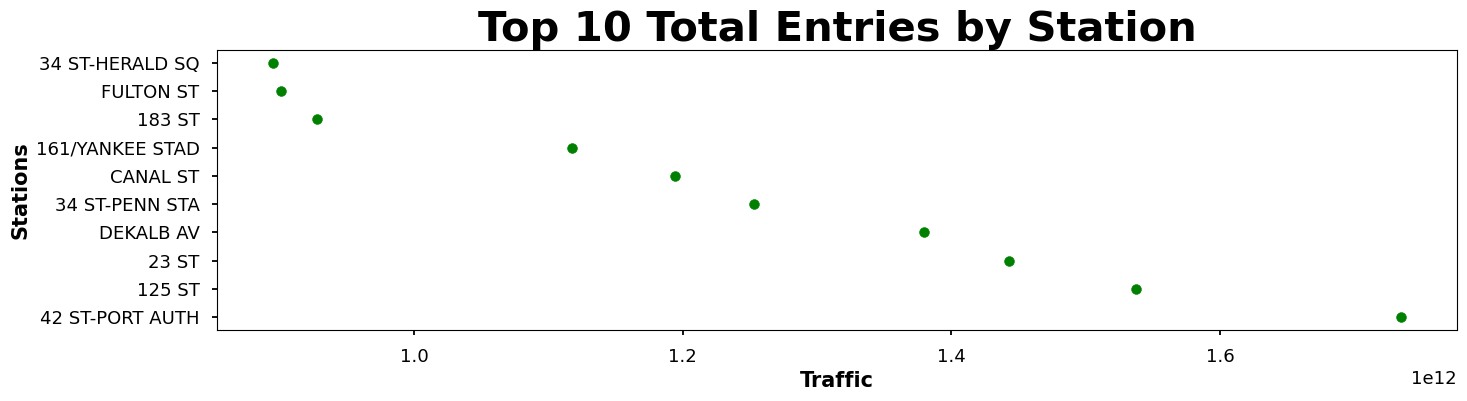

In [28]:
fig = plt.figure(1, figsize = (16, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Traffic', fontsize=15, weight='bold')
ax1.set_ylabel('Stations', fontsize=15, weight='bold')
ax1.set_title('Top 10 Total Entries by Station', fontsize=30, weight='bold')
ax1.scatter(df_total_entries['TOTAL'], df_total_entries['STATION'], s= 50, marker = 'o', c='green');





[Text(0.5, 0, 'Total Traffic'), Text(0, 0.5, 'STATION')]

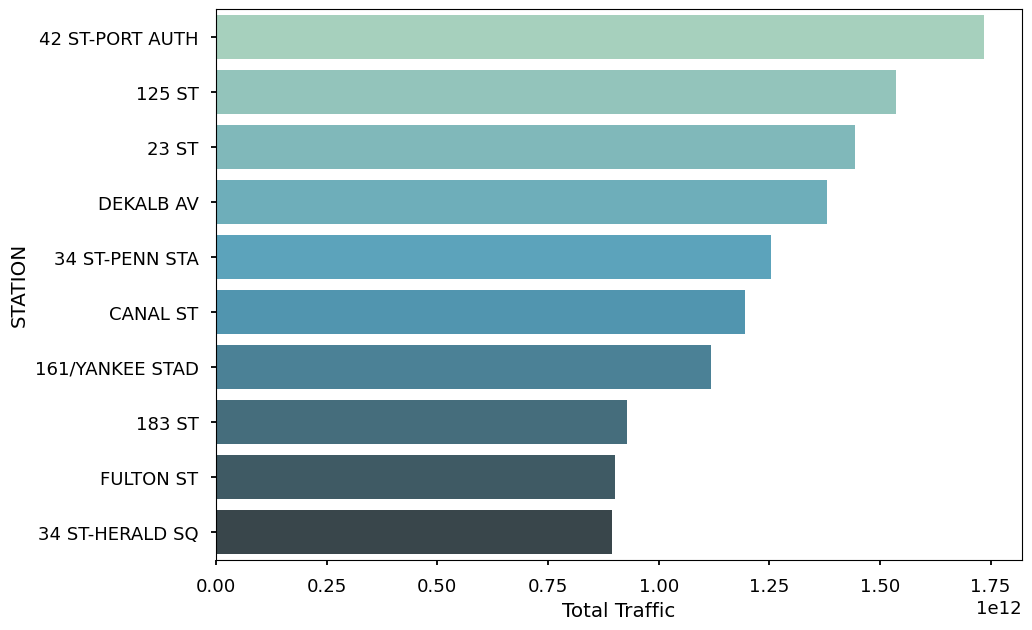

In [30]:
graph = sns.barplot(x = 'TOTAL', y = 'STATION', data = df_total_entries, palette = 'GnBu_d')
graph.set(xlabel = 'Total Traffic', ylabel = 'STATION')


C:\Users\Mert\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mert\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


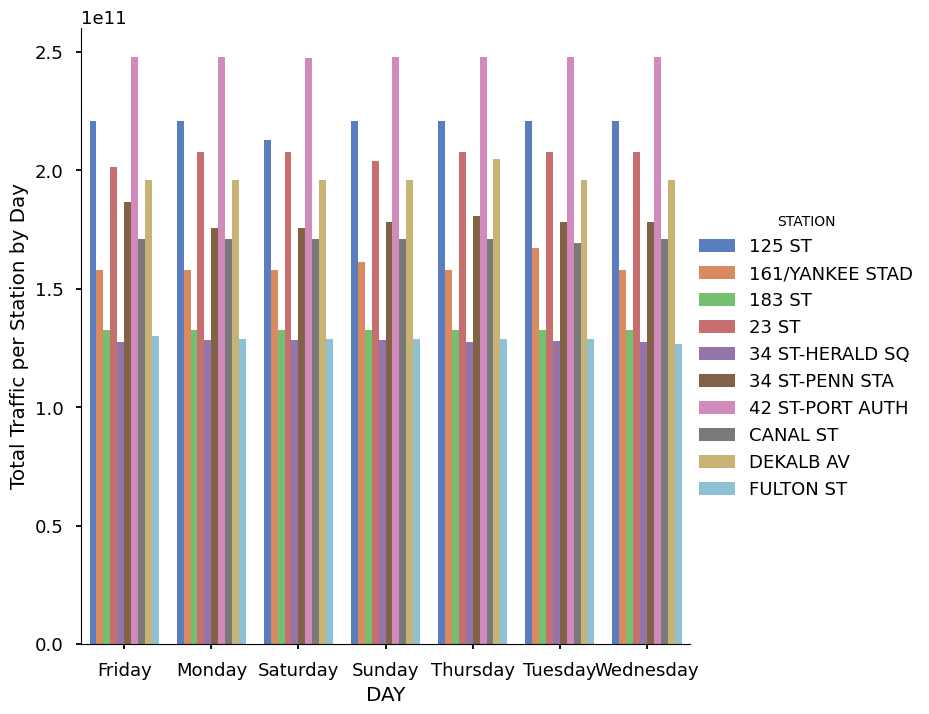

In [31]:
graph_8 = sns.factorplot(x = 'DAY', y = 'TOTAL', hue = 'STATION', data = df_entries_byday, size = 7, kind = 'bar',palette='muted')
graph_8.set(xlabel = 'DAY', ylabel = 'Total Traffic per Station by Day')
graph_8.savefig("dayyy2.png")


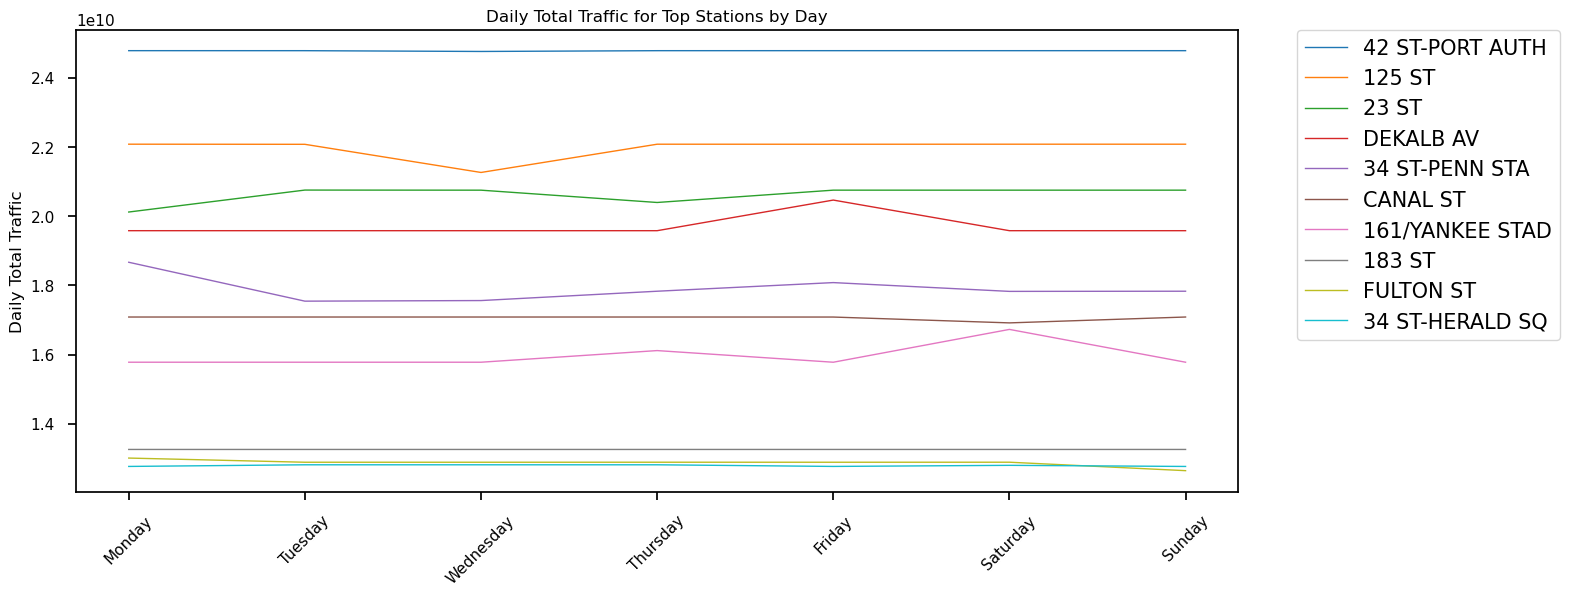

In [32]:
top_10 = list(df_total_entries['STATION'][:10])

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
daily = df.groupby(['STATION','DAY']).sum().reset_index()
daily[daily.STATION.isin(top_10)]

plt.figure(figsize=[15,6])
for stat in top_10:
    plt.plot(daily.DAY[daily.STATION==stat],daily.TOTAL[daily.STATION==stat]/10, label = stat)
plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=45)
plt.legend(top_10,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop = {'size':15})
plt.ylabel('Daily Total Traffic')
plt.title('Daily Total Traffic for Top Stations by Day');
plt.savefig('cizgi.png')

In [33]:
#top10 stations daily traffic
daily_top10 = list(df_total_entries['STATION'][: 10])
df_entries_ti = df.groupby(['STATION', 'TIME_INTERVAL']).agg({'TOTAL': 'sum'}).reset_index()
df_entries_ti = df_entries_ti[df_entries_ti['STATION'].isin(daily_top10)].sort_values("TIME_INTERVAL", ascending=True).sort_index(level="STATION_LINE", sort_remaining=False)
df_entries_ti.reset_index(inplace=True)
df_entries_ti.drop(columns='index', inplace=True)

df_entries_ti

,STATION,TIME_INTERVAL,TOTAL
0,125 ST,00AM-04AM,257572118864
1,125 ST,04AM-08AM,249378657474
2,125 ST,08AM-12PM,257572322179
3,125 ST,12PM-16PM,257556595063
4,125 ST,16PM-20PM,257572879973
5,125 ST,20PM-00AM,257573181031
6,161/YANKEE STAD,00AM-04AM,184072580707
7,161/YANKEE STAD,04AM-08AM,184075528931
8,161/YANKEE STAD,08AM-12PM,186832005043
9,161/YANKEE STAD,12PM-16PM,184075618285


C:\Users\Mert\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mert\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


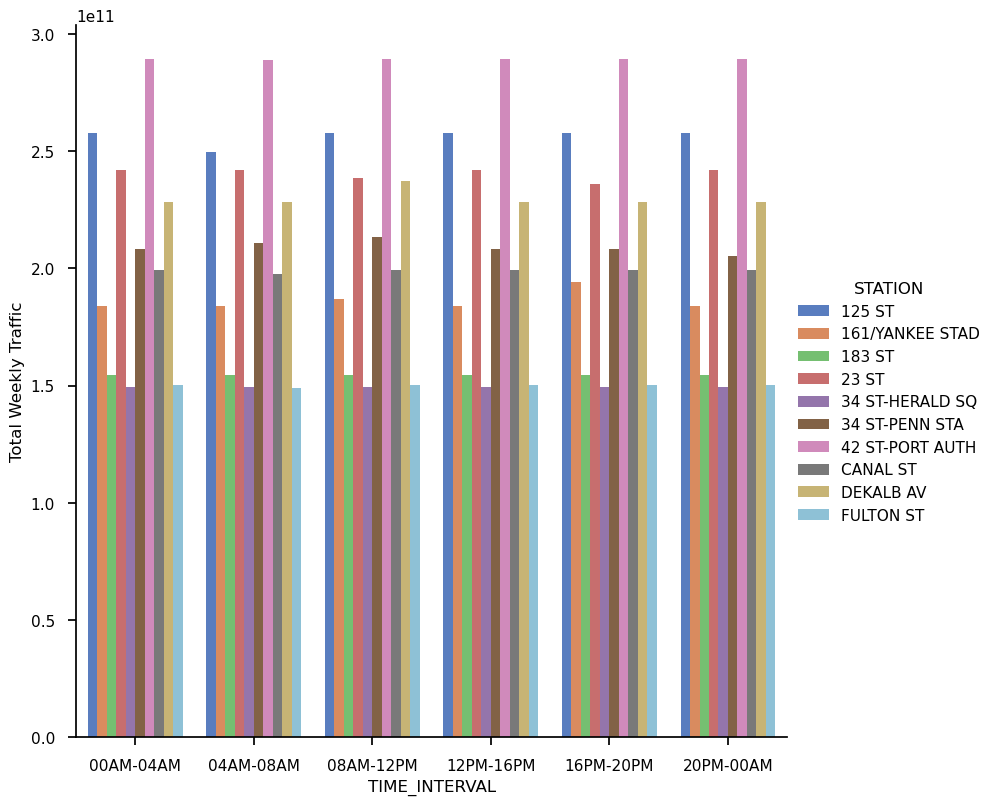

In [34]:
graph_9 = sns.factorplot(x = 'TIME_INTERVAL', y = 'TOTAL', hue = 'STATION', data = df_entries_ti, size = 8, kind = 'bar',palette='muted')
graph_9.set(xlabel = 'TIME_INTERVAL', ylabel = 'Total Weekly Traffic')

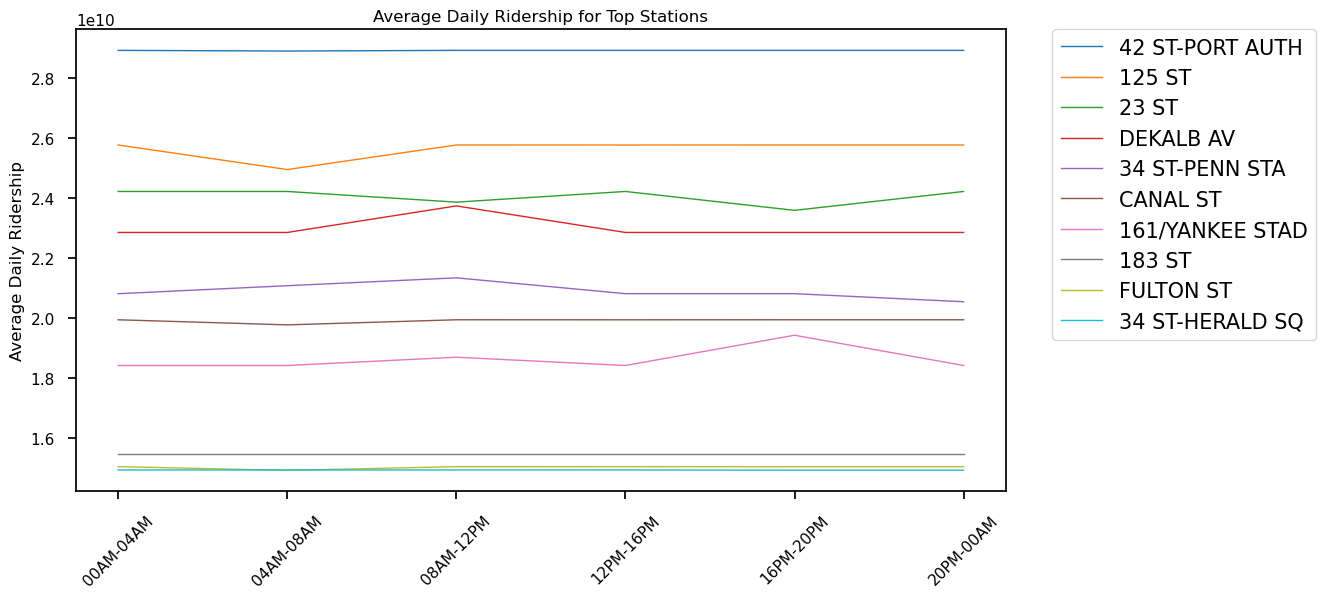

In [35]:
top_10 = list(df_total_entries['STATION'][:10])

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
daily = df.groupby(['STATION','TIME_INTERVAL']).sum().reset_index()
daily[daily.STATION.isin(top_10)]

plt.figure(figsize=[12,6])
for stat in top_10:
    plt.plot(daily.TIME_INTERVAL[daily.STATION==stat],daily.TOTAL[daily.STATION==stat]/10, label = stat)
plt.xticks(range(6), ['00AM-04AM','04AM-08AM','08AM-12PM','12PM-16PM','16PM-20PM','20PM-00AM'],rotation=45)
plt.legend(top_10,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop = {'size':15})
plt.ylabel('Average Daily Ridership')
plt.title('Average Daily Ridership for Top Stations');

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


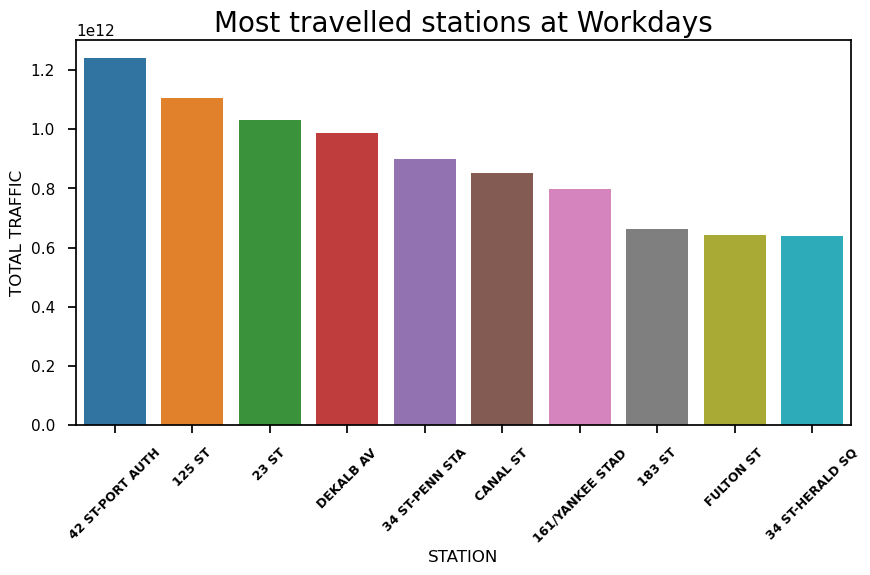

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(df_workday_total_entries['STATION'],df_workday_total_entries['TOTAL'])
plt.title('Most travelled stations at Workdays',fontsize=20)
plt.ylabel('TOTAL TRAFFIC')
plt.xlabel('STATION')
plt.xticks(rotation=45,fontsize=9,weight='bold')
plt.savefig('workdays.png', dpi=400)


In [37]:
station1_dayofweek = (df_entries_byday[(df_entries_byday['STATION']=='42 ST-PORT AUTH')])
station1_dayofweek

,STATION,DAY,TOTAL
42,42 ST-PORT AUTH,Friday,247804794022
43,42 ST-PORT AUTH,Monday,247800928507
44,42 ST-PORT AUTH,Saturday,247574662711
45,42 ST-PORT AUTH,Sunday,247800241231
46,42 ST-PORT AUTH,Thursday,247803778757
47,42 ST-PORT AUTH,Tuesday,247801810426
48,42 ST-PORT AUTH,Wednesday,247802782042


C:\Users\Mert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '42 ST-PORT AUTH'),
  Text(1, 0, '125 ST'),
  Text(2, 0, '23 ST'),
  Text(3, 0, 'DEKALB AV'),
  Text(4, 0, '34 ST-PENN STA'),
  Text(5, 0, 'CANAL ST'),
  Text(6, 0, '161/YANKEE STAD'),
  Text(7, 0, '183 ST'),
  Text(8, 0, 'FULTON ST'),
  Text(9, 0, '34 ST-HERALD SQ')])

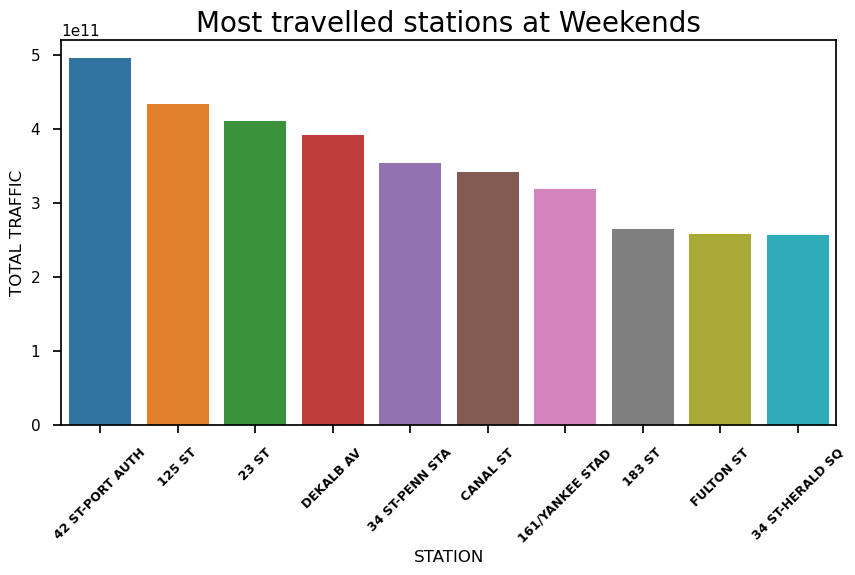

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(df_weekend_total_entries['STATION'],df_weekend_total_entries['TOTAL'])
plt.title('Most travelled stations at Weekends',fontsize=20)
plt.ylabel('TOTAL TRAFFIC')
plt.xlabel('STATION')
plt.xticks(rotation=45,fontsize=9,weight='bold')

In [39]:
df_total_entriesday = df.groupby(['DAY']).agg({'TOTAL': 'sum'}).sort_values(['TOTAL'], ascending=False).reset_index().head(10)

df_total_entriesday

,DAY,TOTAL
0,Friday,6823813345270
1,Tuesday,6777922493222
2,Monday,6766797371953
3,Thursday,6766635623752
4,Sunday,6760891822134
5,Saturday,6755362437408
6,Wednesday,6740335786308


C:\Users\Mert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Sunday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Wednesday')])

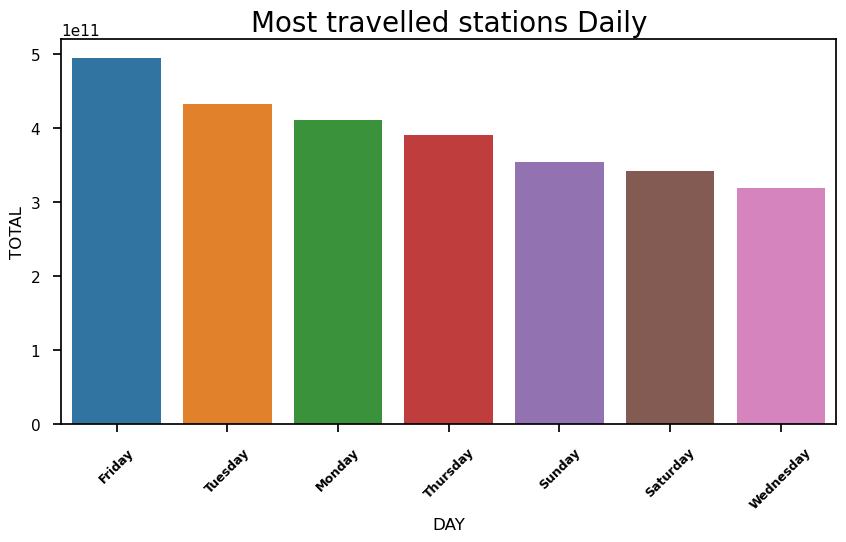

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(df_total_entriesday['DAY'],df_weekend_total_entries['TOTAL'])
plt.title('Most travelled stations Daily',fontsize=20)
plt.ylabel('TOTAL')
plt.xlabel('DAY')
plt.xticks(rotation=45,fontsize=9,weight='bold')

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '16PM-20PM'),
  Text(1, 0, '08AM-12PM'),
  Text(2, 0, '12PM-16PM'),
  Text(3, 0, '20PM-00AM'),
  Text(4, 0, '00AM-04AM'),
  Text(5, 0, '04AM-08AM')])

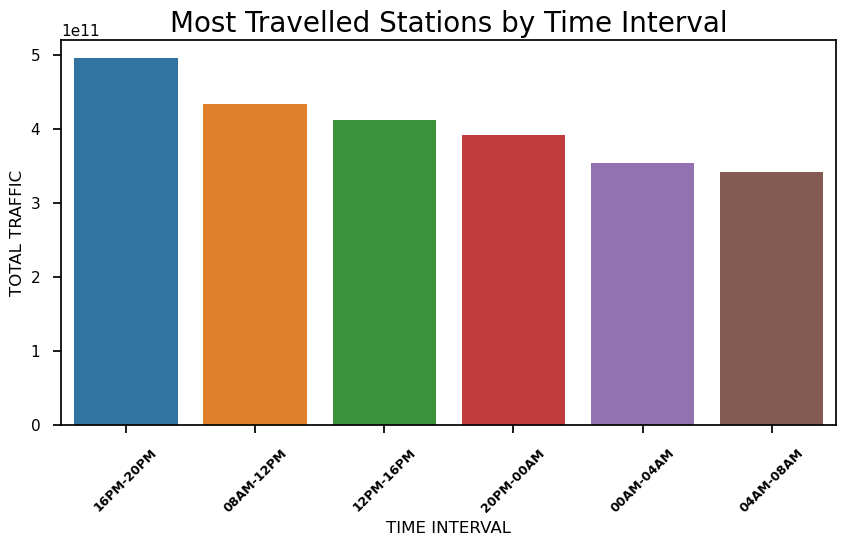

In [41]:
df_total_entriesday = df.groupby(['TIME_INTERVAL']).agg({'TOTAL': 'sum'}).sort_values(['TOTAL'], ascending=False).reset_index().head(10)

df_total_entriesday

plt.figure(figsize=(10,5))
sns.barplot(df_total_entriesday['TIME_INTERVAL'],df_weekend_total_entries['TOTAL'])
plt.title('Most Travelled Stations by Time Interval',fontsize=20)
plt.ylabel('TOTAL TRAFFIC')
plt.xlabel('TIME INTERVAL')
plt.xticks(rotation=45,fontsize=9,weight='bold')